# Cultural evolution of collatoral signals vs. regular vocabulary


## Observation: 
Corpus work on continuers: Continuer-type collateral signals are:
- phonologically less diverse
- structurally simpler
- shorter than other words

## Hypothesis: 
Collatoral signals have culturally evolved to (i) be short and simple, and (ii) make use of a restricted and distinct subset of phonemes and multimodal elements, because that way they minimise disruption to the flow of conversation. Here we will first focus on continuer signals (like *mmhmm*) specifically, as an example of the broader category of collatoral signals. 

### Potential sources of disruption:
1. **Production effort:** More effortful --> slows down conversation (both time & processing)
2. **Confusability with regular vocabulary:** More confusable --> higher processing demands & increased chance of misinterpretation of the function (as content instead of collatoral)

2021-04-30 14:05:39 

## Modelling framework: Exemplar model

Winter & Wedel (2016) about exemplar models: 


_"Within this framework, linguistic categories such as a words and sounds are modeled as populations
of stored instances or exemplars of that category. A strength of this framework is its ability
to account for the observation that speakers’ categorization behavior changes as variants
of a category are experienced. Assuming a previously evolved system of discrete
linguistic categories, this paper uses this exemplar framework to explore how the distribution
of sound categories continues to be influenced by word categories in individuals, and
by extension, how the larger system of sound categories in a population can evolve over
the course of language change." (p. 504)_

2021-04-30 14:17:21 

## Prediction:

Given a model like that of Wedel (2012) and Winter & Wedel (2016), we predict that if we make a distinction between a class of collatoral/continuer words vs. a class of regular vocabulary words, and put the class of collatoral/continuer words under adapted pressures compared to those that the regular vocabulary words are subject to, this will cause the collatoral/continuer words to always end up in the same region of the space, whereas the regular vocabulary words are free to move around. 

That is, the regulary vocabulary words are truly *arbitrary*: it doesn't matter whether word category 1 ends up in the top-left quadrant of the space or in the bottom-right quadrant, etc.; and the same holds for all other word categories within the regular vocabulary class.
The word(s) in the collatoral/continuer class however, are subject to specific pressures that cause the form to be non-arbitrary; meaning that the word(s) in that class always end up in the same region of the possibility space, across independent simulation runs with independent randomised initialisations of the word category clusters.

If we'd start working with more than 1 word in the class of continuers, we'd further adapt the pressures such that *within* the class of continuers, the anti-ambiguity bias is minimal. The idea behind this is that it's not important to distinguish *mmhmm* from *mmm*. The corresponding prediction would then be that all words in the continuer class end up clustered together in the same region of the possibility space.

## Replication of Winter & Wedel (2016) / Wedel (2012), with some added features


### General features

- An **agent** consists of a lexicon of $|W|$ word categories (let's start with 4). One word in that set should be singled out as the *continuer* word. In other words, the entire set of word categories $W$ can be further split up into a set of regular vocabulary words (let's call it $V$) and a set of collatoral/continuer words (let's call it $C$), where $W = V \cup C$ and $V \cap C = \varnothing$. Let's start with $|C| = 1$. For the word(s) in the set $C$, additional and/or adapted pressures will apply. (We want to *increase* the pressure for minimal production effort, and *ease* the pressure for re-use of features; see Section 1.4.4 below.)
    - A **word** is represented by a set of exemplars. 
        - An **exemplar** is represented by a vector that designates a point in an *n*-dimensional space. Let's start with 2 dimensions, and let's have them both range arbitrarily from 0 to 100 (with integer values in between). An example of an exemplar would then be $[15, 25]$ (these individual values in the vector, like 15 and 25, are referred to as "segments" by Wedel, 2012).


- **Initialisation of an agent:** _"Both agents’ lexicons are pre-seeded with 100 clustered exemplars of each word category."_ (Wedel, 2012) <span class="mark">--> What does clustered mean here exactly? How are these initialised? Just start each word category by choosing a random point in the 2D-space, and then generate the other 99 exemplars around that point? Not sure...</span>

### A simulation:

- Wedel (2012) talks about 20 independent simulation runs per condition, consisting of 10,000 rounds each. However, the figures usually show the result after 4,000 rounds.
- **Round of interactions:** 
    - _"Agents take turns talking to each other: In each round, the speaker utters one token of each word in its lexicon, and the listener maps each token to the best fitting category and stores it there as a new exemplar of that category._ (Winter & Wedel, 2016)
    - _"After a speaker has produced an output target for each of its word categories, roles reverse."_ (Wedel, 2012; Appendix)
    - _"Agents take turns producing an output from each of their word categories for each other, and likewise take turns categorizing and storing the outputs of the other."_ 
- **Success:**_"Within the scope of this model, communication is successful to the extent that the listener maps the speaker’s output to the intended word category."_


### Pressures at play for regular vocabulary


#### Production:



Production begins by selecting one exemplar from a word category: An exemplar is chosen from the target word category with probability proportional to the exemplar's activation level. 

##### Activation level
- _"Each new exemplar is associated with an initial activation value that decreases over time (i.e., memory decay; Hintzman, 1986; Nosofsky, 1986; Pierrehumbert, 2001)."_ (Winter & Wedel, 2016)
- _"Activation is calculated as an exponential function of recency, where exemplars that were stored 100 rounds previously have an activation level that is approximately .1% that of a new exemplar)."_ (Wedel, 2012)
- _"In the model runs shown here, the activation of a exemplar is modeled as $e^{(.2j)}$, where $j$ is its list position; this results in a exemplar at position 100 having an activation that is approximately .01 times that of an exemplar at position 1."_ (Wedel, 2012; Appendix)
- _"The probability of an exemplar being chosen as a production target is its activation relative to the total activation of all exemplars in the category."_ (Wedel, 2012; Appendix)
- _"Exemplars at list positions greater than 100 are discarded after every round to keep computation efficient; preserving more exemplars slows the rate of change in the system but otherwise does not qualitatively change system behavior."_ (Wedel, 2012; Appendix)

##### Intermezzo: Worked example for activation level:

The text in the body of the 2012 paper and the text in the appendix of the 2012 paper give different ratios of activation for an exemplar at position 1 versus an exemplar at position 100.
- The body of the paper says an exemplar at position 100 should have an activation level that is approximately 0.1% that of a new exemplar. Approximately 0.1% = ~0.001 times the activation of a new exemplar.
- The appendix, on the other hand, says that an exemplar at position 100 should have an activation level that is approximately 0.01 times that of an exemplar at position 1.

To make things even more confusing, neither of these examples from the text correspond with the equation that is given in the appendix: $e^{(.2j)}$ where $j$ is the list position of the exemplar. 

I would interpret this as follows:

In [1]:
import math

def activation_level_original(j):
    return math.exp((0.2*j))

activation_level_position_1 = activation_level_original(1)
print('')
print("activation_level_position_1 is:")
print(activation_level_position_1)

activation_level_position_100 = activation_level_original(100)
print('')
print("activation_level_position_100 is:")
print(activation_level_position_100)

ratio = activation_level_position_100/activation_level_position_1
print('')
print("ratio is:")
print(ratio)


activation_level_position_1 is:
1.2214027581601699

activation_level_position_100 is:
485165195.4097903

ratio is:
397219665.8050838


This can **definitely** not be right, because the exemplar at list position 100 has a *higher* activation level than the exemplar at position 1.

Could there be a minus sign missing in the exponent? Maybe something went wrong in typesetting the equation?

In [2]:
import math

def activation_level_with_minus(j):
    return math.exp((-0.2*j))

activation_level_position_1 = activation_level_with_minus(1)
print('')
print("activation_level_position_1 is:")
print(activation_level_position_1)

activation_level_position_100 = activation_level_with_minus(100)
print('')
print("activation_level_position_100 is:")
print(activation_level_position_100)

ratio = activation_level_position_100/activation_level_position_1
print('')
print("ratio is:")
print(ratio)


activation_level_position_1 is:
0.8187307530779818

activation_level_position_100 is:
2.061153622438558e-09

ratio is:
2.51749871943828e-09


Ok, now at least the exemplar at list position 100 has a smaller activation level than the exemplar at list position 1, but the ratio is *way* more exaggerated than the examples given in the text.

If we'd want to replicate the examples given in the text (either a ratio of ~0.01 or a ratio of ~0.001), we'd need to use the following numbers instead of 0.2:

In [3]:
import math

def activation_level_with_minus_and_constant_as_argument(j, constant):
    return math.exp((-constant*j))


constant = 0.046 

activation_level_position_1 = activation_level_with_minus_and_constant_as_argument(1, constant)
print('')
print("activation_level_position_1 is:")
print(activation_level_position_1)

activation_level_position_100 = activation_level_with_minus_and_constant_as_argument(100, constant)
print('')
print("activation_level_position_100 is:")
print(activation_level_position_100)

ratio = activation_level_position_100/activation_level_position_1
print('')
print("ratio is:")
print(ratio)


activation_level_position_1 is:
0.9550419621907147

activation_level_position_100 is:
0.010051835744633586

ratio is:
0.010525019991348097


In [4]:
constant = 0.069

activation_level_position_1 = activation_level_with_minus_and_constant_as_argument(1, constant)
print('')
print("activation_level_position_1 is:")
print(activation_level_position_1)

activation_level_position_100 = activation_level_with_minus_and_constant_as_argument(100, constant)
print('')
print("activation_level_position_100 is:")
print(activation_level_position_100)

ratio = activation_level_position_100/activation_level_position_1
print('')
print("ratio is:")
print(ratio)


activation_level_position_1 is:
0.933326680078202

activation_level_position_100 is:
0.0010077854290485105

ratio is:
0.0010797777997346757


Another possibility is that the % sign in the text example in the body of the paper was put there by accident? So that the author actually means a ratio of of ~0.1? Would that bring the constant closer to the 0.2 given in the appendix?

What constant would give us something close to a ratio of ~0.1?

In [5]:
constant = 0.023

activation_level_position_1 = activation_level_with_minus_and_constant_as_argument(1, constant)
print('')
print("activation_level_position_1 is:")
print(activation_level_position_1)

activation_level_position_100 = activation_level_with_minus_and_constant_as_argument(100, constant)
print('')
print("activation_level_position_100 is:")
print(activation_level_position_100)

ratio = activation_level_position_100/activation_level_position_1
print('')
print("ratio is:")
print(ratio)


activation_level_position_1 is:
0.9772624837732771

activation_level_position_100 is:
0.10025884372280375

ratio is:
0.10259152007523865


Hmm, ok, at least there's a 2 in the constant now. So if we'd imagine there is not only a minus sign missing from the equation as it appears in the appendix, but that there's also a zero missing, and that the % sign in the body of the text was put there by accident, *then* we might get something that more or less works?
So in that case, the correct equation would be: $e^{(-0.02j)}$

But this would require a lot of creative interpretation....

**So we asked Andy Wedel via email.** He writes: 
$$ \text{prop} = 2.72 ^{(-j/ \text{decay})} $$
Where *decay* is the total number of exemplars (in most of the runs either 100 or 200) divided by 5

In [6]:
n = 100

def activation_level_wedel(j):
    return 2.72**(-j/(n/5))

activation_level_position_1 = activation_level_wedel(1)
print('')
print("activation_level_position_1 is:")
print(activation_level_position_1)

activation_level_position_100 = activation_level_wedel(100)
print('')
print("activation_level_position_100 is:")
print(activation_level_position_100)

ratio = activation_level_position_100/activation_level_position_1
print('')
print("ratio is:")
print(ratio)


activation_level_position_1 is:
0.9511993718183768

activation_level_position_100 is:
0.006716692712056564

ratio is:
0.007061288002342223


Actually, this number 2.72 must come from Euler's number. So to make things a bit cleaner, let's use this:

In [7]:
import math

n = 100

def activation_level_wedel(j):
    return math.exp((-j/(n/5)))

activation_level_position_1 = activation_level_wedel(1)
print('')
print("activation_level_position_1 is:")
print(activation_level_position_1)

activation_level_position_100 = activation_level_wedel(100)
print('')
print("activation_level_position_100 is:")
print(activation_level_position_100)

ratio = activation_level_position_100/activation_level_position_1
print('')
print("ratio is:")
print(ratio)


activation_level_position_1 is:
0.951229424500714

activation_level_position_100 is:
0.006737946999085467

ratio is:
0.00708340892905212


#####  Model description continued:

After a target exemplar has been selected on the basis of its activation level, two different similarity biases are applied to it:

##### Similarity biases:

Consist of the following two components:

- **Within-word category similarity bias:** _"The segment exemplar values of this initial word target are stochastically biased toward the value at the same positions in all the word exemplars within the category"_
    - _"At the word level, population vectors are calculated for the segment values in the target word relative to all segment values at the same position over all exemplars within that word category"_ (Wedel, 2012; Appendix)

- **Within-segment-dimension similarity bias:** _"each individual segment exemplar value in the target is also stochastically biased toward all other segment exemplars that reference the same dimension across the entire lexicon"_ 
    - _"At the segment level, population vectors are calculated for the segment values in the target word relative to all segment values on that dimension across the lexicon."_ (Wedel, 2012; Appendix)

- _"The population vector with respect to a particular point within a particular segment dimension is a weighted average of all segment exemplars mapped to the category, where both the Euclidean distance from the target exemplar and activation influence each exemplar’s contribution. This is conceptually the same as Nosofsky’s Generalized Context model (Nosofsky 1988), modified to take exemplar activation into account. The formula used to incorporate these factors is given below, where $p$ is the output population vector, y is each position within the segment dimension value of the target under production, $w_{y}$ is the activation of the exemplar, $x$ is the reference point chosen as the basis for production, and $k$ is a scaling factor influencing the fall off of the contribution to the population vector of the point $y$ relative to $x$:"_ (Wedel, 2012; Appendix)

$$ p = \frac{\sum_y yw_{y} e^{-k |x-y|}}{\sum_{y} w_{y} e^{-k |x-y|}} $$

- _"The value of $k$ used in the simulations shown here is 0.2; a larger value of $k$ reduces the effect of more distant values on the population vector."_ (Wedel, 2012; Appendix). --> Let us start with $k = 0.2$ as well, but make $k$ into a parameter that we can change just in case.


- _"To model the influence of both word and segment recency and similarity on production variation, the population vectors at each segment dimension at each level are combined to create a new output that combines information from both within-word category, and within-lexicon sources. The relative contribution of word versus segment population vectors to the output was fixed at .9."_ (Wedel, 2012; Appendix). I wasn't immediately sure how to interpret this, but I think the following is the most likely interpretation:
    - I think it's clear that the final output vector should be a weighted average of the within-word and within-segment population vectors. And I'm assuming the weight of one of them should be 0.9, while the weight of the other is 1.0. (When expressed as a fraction, the 0.9:1 ratio corresponds to 0.9.)
    - <span class="mark">I'm not 100% sure which way around these weightings should be</span>, but I think the most plausible interpretation is that word:segment = 0.9:1.0. Meaning that the weight of the within-word population vector is 0.9, while the weight of the within-segment population vector is 1.0.
    
--> **We found this in the scripts that Andy Wedel sent us:** 

$$ \$outword[\$a] = ((9*\$outword[\$a]) + \$outsounds[\$a])/10 $$

where $\$outword$ is the population vector for the within-word similarity bias, and $\$outsounds$ is the population vector for the within-segment similarity bias.
--> So it's actually $(0.9*outword) + (0.1*outsounds)$

--> And a comment in Andy's code indeed says: "*For the Winter/Wedel paper, we used a proportion of .9 of the word-based bias to .1 of the sound based bias.*"

##### Intermezzo: Worked example for similarity biases:

###### Within-word category similarity bias:

In [8]:
import math
import numpy as np # to create arrays that are easily manipulated along differen axes

# Worked example for within-word category similarity bias:

# Imagine these are all the exemplars across all different word categories 
# (in the full model there'd be 100 exemplars per category, rather than 4):

# word category 1:
exemplar_1_1 = [15, 25]
exemplar_1_2 = [16, 26]
exemplar_1_3 = [18, 28]
exemplar_1_4 = [12, 23]

# word category 2:
exemplar_2_1 = [70, 31]
exemplar_2_2 = [68, 29]
exemplar_2_3 = [73, 32]
exemplar_2_4 = [72, 30]

# word category 3:
exemplar_3_1 = [21, 72]
exemplar_3_2 = [19, 77]
exemplar_3_3 = [23, 70]
exemplar_3_4 = [20, 75]

# word category 4:
exemplar_4_1 = [76, 65]
exemplar_4_2 = [72, 68]
exemplar_4_3 = [78, 64]
exemplar_4_4 = [74, 69]

# And imagine they have the following (normalised) activation levels:

# word category 1:
activation_ex_1_1 = 0.4
activation_ex_1_2 = 0.3
activation_ex_1_3 = 0.2
activation_ex_1_4 = 0.1

# word category 2:
activation_ex_2_1 = 0.65
activation_ex_2_2 = 0.15
activation_ex_2_3 = 0.1
activation_ex_2_4 = 0.1

# word category 3:
activation_ex_3_1 = 0.5
activation_ex_3_2 = 0.3
activation_ex_3_3 = 0.15
activation_ex_3_4 = 0.05

# word category 4:
activation_ex_4_1 = 0.7
activation_ex_4_2 = 0.2
activation_ex_4_3 = 0.05
activation_ex_4_4 = 0.05

# This allows us to construct the speaker's lexicon as follows:

speaker_lexicon = np.array([[exemplar_1_1, exemplar_1_2, exemplar_1_3, exemplar_1_4],
                    [exemplar_2_1, exemplar_2_2, exemplar_2_3, exemplar_2_4],
                    [exemplar_3_1, exemplar_3_2, exemplar_3_3, exemplar_3_4],
                    [exemplar_4_1, exemplar_4_2, exemplar_4_3, exemplar_4_4]])


speaker_activations = np.array([[activation_ex_1_1, activation_ex_1_2, activation_ex_1_3, activation_ex_1_4],
                        [activation_ex_2_1, activation_ex_2_2, activation_ex_2_3, activation_ex_2_4],
                        [activation_ex_3_1, activation_ex_3_2, activation_ex_3_3, activation_ex_3_4],
                        [activation_ex_4_1, activation_ex_4_2, activation_ex_4_3, activation_ex_4_4]])


# Now imagine exemplar_1_1 is chosen as the exemplar to be produced, 
# based on its activation level

# For each segment of exemplar_1_1, we then first calculate a population vector,
# using the segment values at the same position (i.e. 1st dimension or 2nd dimension)
# from all other exemplars within that same word category.
# That population vector is a weighted average of all segment exemplars mapped to the
# category, using Equation 1.
# First, let's translate Equation 1 to a function:

def population_vector(x, y_values, w_y_values, k):
    numerator = 0
    denominator = 0
    for i in range(len(y_values)):
        y = y_values[i]
        w_y = w_y_values[i]
        numerator += y*w_y*math.exp(-k*abs(x-y))
        denominator += w_y*math.exp(-k*abs(x-y))
    print("numerator is:")
    print(numerator)
    print("denominator is:")
    print(denominator)
    p = numerator/denominator
    return p


# Now let's figure out what the relevant input arguments 
# for the population_vector function are:
# We have to calculate a separate population vector for each dimension.
# Let's start with the 1st dimension:
# We said that exemplar_1_1 was chosen as the reference point for production,
# based on its activation level. That means that x for the 1st dimension should
# be 15.
# Consequently the y_values for the first dimension should be [15, 16, 18, 12].
# Let's write a function to easily grab these values and calculate the population vector
# for the two different dimensions:

def similarity_bias_within_word(lexicon, activations, word_index, exemplar_index, k):
    reference_exemplar = lexicon[word_index][exemplar_index]
    p_per_dimension = []
    for dimension in range(len(reference_exemplar)):
        print('')
        print('')
        print("dimension is:")
        print(dimension)
        x = reference_exemplar[dimension]
        print("x is:")
        print(x)
        y_values = lexicon[word_index][:,dimension]
        print("y_values are:")
        print(y_values)
        w_y_values = activations[word_index]
        print("w_y_values are:")
        print(w_y_values)
        p = population_vector(x, y_values, w_y_values, k)
        print("p for dimension "+str(dimension)+" is:")
        print(p)
        p_per_dimension.append(p)
    return p_per_dimension
        
        
# Let's set k to 0.2, as in Wedel (2012):
k = 0.2

# Finally, we need the index of the target word and the selected reference exemplar. 
# These should both be 0, because we said the target was word category 1, 
# and exemplar_1_1 was chosen based on its activation level.
target_word_index = 0
reference_exemplar_index = 0

pop_vector_within_word = similarity_bias_within_word(speaker_lexicon, speaker_activations, target_word_index, reference_exemplar_index, k)
print('')
print("pop_vector_within_word is:")
print(pop_vector_within_word)




dimension is:
0
x is:
15
y_values are:
[15 16 18 12]
w_y_values are:
[0.4 0.3 0.2 0.1]
numerator is:
12.564203468025639
denominator is:
0.8102627167516026
p for dimension 0 is:
15.506332956298879


dimension is:
1
x is:
25
y_values are:
[25 26 28 23]
w_y_values are:
[0.4 0.3 0.2 0.1]
numerator is:
21.001181142016776
denominator is:
0.8224135577457639
p for dimension 1 is:
25.536034692303748

pop_vector_within_word is:
[15.506332956298879, 25.536034692303748]


As we can see if we run the code block above, both segment values of the reference exemplar (originally [15, 25]) get moved upwards after the within-word category similarity bias has been applied. From 15 to 15.51, and from 25 to 25.54.

This makes sense, because if we look at the other exemplar within the category and their activation levels, we see that most other exemplars within the category (exemplars 1_2 and 1_3) have slightly higher segment values than the reference exemplar that was chosen (exemplar_1_1).
The only exemplar that has lower values than the reference exemplar (exemplar_1_4) has a relatively low activation level, and therefore contributes less to the shift.

###### Within-segment similarity bias:

In [9]:
# Now let's do a worked example for the within-segment similarity bias:

# We can reuse the population_vector() and similarity_bias() functions defined above.
# The only difference is that now we give the entire lexicon (i.e. all exemplars,
# across word categories) as input, rather than only the within word category exemplars:

def similarity_bias_within_segment(lexicon, activations, word_index, exemplar_index, k):
    reference_exemplar = lexicon[word_index][exemplar_index]
    p_per_dimension = []
    for dimension in range(len(reference_exemplar)):
        print('')
        print('')
        print("dimension is:")
        print(dimension)
        x = reference_exemplar[dimension]
        print("x is:")
        print(x)
        y_values = lexicon[:,:,dimension].flatten()
        print("y_values are:")
        print(y_values)
        w_y_values = activations.flatten()
        print("w_y_values are:")
        print(w_y_values)
        p = population_vector(x, y_values, w_y_values, k)
        print("p for dimension "+str(dimension)+" is:")
        print(p)
        p_per_dimension.append(p)
    return p_per_dimension

pop_vector_within_segment = similarity_bias_within_segment(speaker_lexicon, speaker_activations, target_word_index, reference_exemplar_index, k)
print('')
print("pop_vector_within_segment is:")
print(pop_vector_within_segment)



dimension is:
0
x is:
15
y_values are:
[15 16 18 12 70 68 73 72 21 19 23 20 76 72 78 74]
w_y_values are:
[0.4  0.3  0.2  0.1  0.65 0.15 0.1  0.1  0.5  0.3  0.15 0.05 0.7  0.2
 0.05 0.05]
numerator is:
19.353971560385215
denominator is:
1.1443598956094228
p for dimension 0 is:
16.912486740090067


dimension is:
1
x is:
25
y_values are:
[25 26 28 23 31 29 32 30 72 77 70 75 65 68 64 69]
w_y_values are:
[0.4  0.3  0.2  0.1  0.65 0.15 0.1  0.1  0.5  0.3  0.15 0.05 0.7  0.2
 0.05 0.05]
numerator is:
30.94231979288734
denominator is:
1.1474077222633343
p for dimension 1 is:
26.96715316840613

pop_vector_within_segment is:
[16.912486740090067, 26.96715316840613]


If we run the code cell above, we see that again the segment values are increased compared to the original target/reference exemplar ([15, 25]): 15 gets changed to 16.91, and 25 gets changed to 26.97.

This makes sense, because I constructed the other exemplars in the lexicon in such a way that they all have higher values on each of the segments than the original target/reference exemplar has.

###### Combining the two similarity biases:

Now the last step is to combine the resulting pop_vector_within_word and pop_vector_within_segment with each other. Wedel (2012; Appendix) says:

_"To model the influence of both word and segment recency and similarity on production variation, the population vectors at each segment dimension at each level are combined to create a new output that combines information from both within-word category, and within-lexicon sources. The relative contribution of word versus segment population vectors to the output was fixed at .9."_

I wasn't immediately sure how to interpret this, but I think the following is the most likely interpretation:
- I think it's clear that the final output vector should be a weighted average of the within-word and within-segment population vectors. <span class="burk">And I'm assuming the weight of one of them should be 0.9, while the weight of the other is 1.0. (When expressed as a fraction, the 0.9:1 ratio corresponds to 0.9.)</span>
- <span class="burk">I'm not 100% sure about the relative weightings, but I think the most plausible interpretation is that word:segment = 0.9:1.0. Meaning that the weight of the within-word population vector is 0.9, while the weight of the within-segment population vector is 1.0.</span>

<span class="mark">---> This turned out to be the wrong inference.</span> Andy writes in his script for the Winter & Wedel (2016) model: 
_``For the Winter/Wedel paper, we used a proportion of .9 of the word-based bias to .1 of the sound based bias."_


This would yield the following outcome:

In [10]:
def combine_pop_vectors(word_vector, segment_vector, word_weight, segment_weight):
    combined_vector = []
    for dimension in range(len(word_vector)):
        word_value = word_vector[dimension]
        segment_value = segment_vector[dimension]
        weighted_avg = ((word_value*word_weight) + (segment_value*segment_weight)) / (word_weight+segment_weight)
        combined_vector.append(weighted_avg)
    return combined_vector

word_weight = 0.9
segment_weight = 0.1

combined_vector = combine_pop_vectors(pop_vector_within_word, pop_vector_within_segment, word_weight, segment_weight)
print("combined_vector is:")
print(combined_vector)
print('')
print("sum(combined_vector) is:")
print(sum(combined_vector))

combined_vector is:
[15.646948334677997, 25.679146539913987]

sum(combined_vector) is:
41.32609487459199


Let's put the combined_vector next to the original within-word population vector and within-segment population vector again:

- pop_vector_within_word is: [15.51, 25.54]
- pop_vector_within_segment is: [16.91, 26.97]
- combined_vector is: [15.65, 25.68]

This makes sense. It looks like a weighted average where the within-word population vector has had a more influence than the within-segment population vector.
Because if we had just taken the unweighted average, it would have been:

In [11]:
import numpy as np

unweighted_average = np.mean((np.array(pop_vector_within_word), np.array(pop_vector_within_segment)), axis=0)
print("unweighted_average is:")
print(unweighted_average)
print('')
print("np.sum(unweighted_average) is:")
print(np.sum(unweighted_average))

unweighted_average is:
[16.20940985 26.25159393]

np.sum(unweighted_average) is:
42.46100377854941


From the fact that the values of the weighted average are lower (i.e. closer to the within-word population vector) than the values of this unweighted average, we see that the within-word population vector has had more influence on the combined vector than the within-segment population vector.

#####  Model description continued:

##### Random noise (i.e. minimal-effort pressure):

_"Noise is added to values of the output target by adding a normally distributed random value. This random value is biased slightly toward the center of the dimension, (i.e. a scale value of 50), in a simple model of production-based lenition (Pierrehumbert 2001; see also e.g. Lindblom et al. 1984 for arguments that the packing of phoneme inventories is in part a consequence of effort-minimization processes). The results described below do not depend on this lenition bias, but they contribute to the illustration by imposing a tendency for each segment exemplar distribution to drift toward the center of each dimension which encourages category merger (see discussion below)."_ 

- _"Finally, a Gaussian random variable with a standard deviation of 3 is added to the output to introduce noise. This variable is biased slightly toward the center of the dimensional space, creating a fixed attractor at the center of each segment dimension in the system. The bias is calculated using a parabolic response curve given below, where $b$ is the bias added to the output population vector, $p$ is the output population vector, $N$ is the number of points in the space and $G$ is a constant; $b$ is subtracted from outputs greater than $N/2$ (here, 50) and added to those below it."_ (Wedel, 2012; Appendix)
    
$$ b = \frac{(p-N/2)^2}{G}$$

- _"The value of G used in these simulations was 5000, giving a bias toward the center of 0.5 at the edges of the continuum. All else being equal, this bias shifts the distributions of both categories toward the center of the dimension over time, i.e. toward 50, which corresponds to a simple model of articulatory undershoot (cf. Lindblom 1983; Pierrehumbert 2001)."_ (Wedel, 2012; Appendix)
 

##### Intermezzo: Worked example for random noise:

Imagine the target output vector is: [15.65, 25.68]

(as was the output of applying and combining the similarity biases above)

In [12]:
n = 100
g = 5000

def bias(p, n, g):
    b = ((p - (n/2))**2)/g
    return b

The text in the appendix of Wedel (2012) gives a worked example: $G=5000$ should give "a bias toward the center of 0.5 at the edges of the continuum". Let's check this:

In [13]:
bias_edge_left = bias(0, n, g)
print("bias_edge_left is:")
print(bias_edge_left)

bias_edge_right = bias(100, n, g)
print("bias_edge_right is:")
print(bias_edge_right)

bias_edge_left is:
0.5
bias_edge_right is:
0.5


This matches the example given in the appendix of Wedel (2012).

In [14]:
import numpy as np

n = 100
g = 5000
output_vector = combined_vector # the values of this are: [16.246413895136346, 26.28925494288395]

def apply_bias(output_vector, n, g):
    biased_vector = []
    for dimension in range(len(output_vector)):
        print('')
        print("dimension is:")
        print(dimension)
        p = output_vector[dimension]
        b = bias(p, n, g)
        print('b is:')
        print(b)
        if p < (n/2):
            biased_mean = p+b
        else:
            biased_mean = p-b
        biased_vector.append(biased_mean)
    return biased_vector
            
biased_means = apply_bias(output_vector, n, g)
print('')
print("biased_means are:")
print(biased_means)


dimension is:
0
b is:
0.23602643174405652

dimension is:
1
b is:
0.11830078260539556

biased_means are:
[15.882974766422054, 25.797447322519382]


The biased_means of [15.88, 25.80] (given $G=5000$) makes sense, because the idea is that the values should move closer to the centre of the space (i.e. 50 and 50).

The next step is then to add random noise by choosing a value from a normal distribution with these new biased values as the mean, and a standard deviation of 3:

In [15]:
std = 3

def add_noise(biased_means, std):
    noisy_segments = []
    for biased_segment in biased_means:
        noisy_segment = np.random.normal(biased_segment, std, 1)
        noisy_segments.append(noisy_segment[0])
    return noisy_segments

noisy_output = add_noise(biased_means, std)
print('')
print("noisy_output is:")
print(noisy_output)


noisy_output is:
[16.935407014495087, 28.753089612021437]


#####  Model description continued:

#### Perception:
        
The listener _"begins the categorization process by calculating the similarity of the speaker output to each category’s stored word exemplars given their activations, in a variant of the Generalized Context Model (Nosofsky 1988). The overall similarities of the speaker output to each category are interpreted as a relative goodness of fit, and the speaker output is then stored as a new exemplar in the best fitting category."_
- _"The listener compares the speaker’s output to all of its word exemplars in each category, calculates a sum similarity score for each category using the Generalized Context Model for categorization (Nosofsky 1988), again modified to take activation into account as above in (1), where the scaling factor $k$ is again .2. The speaker output is then stored as a new exemplar in the best fitting listener word category."_ (Wedel, 2012; Appendix)

##### Intermezzo: Worked example for perception:

The (1) mentioned in the text above corresponds to our Equation 2 in this jupyter notebook: i.e., the one that we used for calculating the population vectors for the similarity biases.

The first step is that the listener calculates the distance of this input vector to the exemplars of each word category in their own lexicon, using Equation 2. Let's first have a look at Equation 2 again (repeated below as Equation 5):


- _"The population vector with respect to a particular point within a particular segment dimension is a weighted average of all segment exemplars mapped to the category, where both the Euclidean distance from the target exemplar and activation influence each exemplar’s contribution. This is conceptually the same as Nosofsky’s Generalized Context model (Nosofsky 1988), modified to take exemplar activation into account. The formula used to incorporate these factors is given below, where $p$ is the output population vector, y is each position within the segment dimension value of the target under production, $w_{y}$ is the activation of the exemplar, $x$ is the reference point chosen as the basis for production, and $k$ is a scaling factor influencing the fall off of the contribution to the population vector of the point $y$ relative to $x$:"_ (Wedel, 2012; Appendix)

$$ p = \frac{\sum_y yw_{y} e^{-k |x-y|}}{\sum_{y} w_{y} e^{-k |x-y|}} $$

- _"The value of $k$ used in the simulations shown here is 0.2; a larger value of $k$ reduces the effect of more distant values on the population vector."_ (Wedel, 2012; Appendix). --> Let us start with $k = 0.2$ as well, but make $k$ into a parameter that we can change just in case.

Now let's have a look at this Nosofsky (1988) paper that they refer to. It has the following two equations in the section on "Classification":

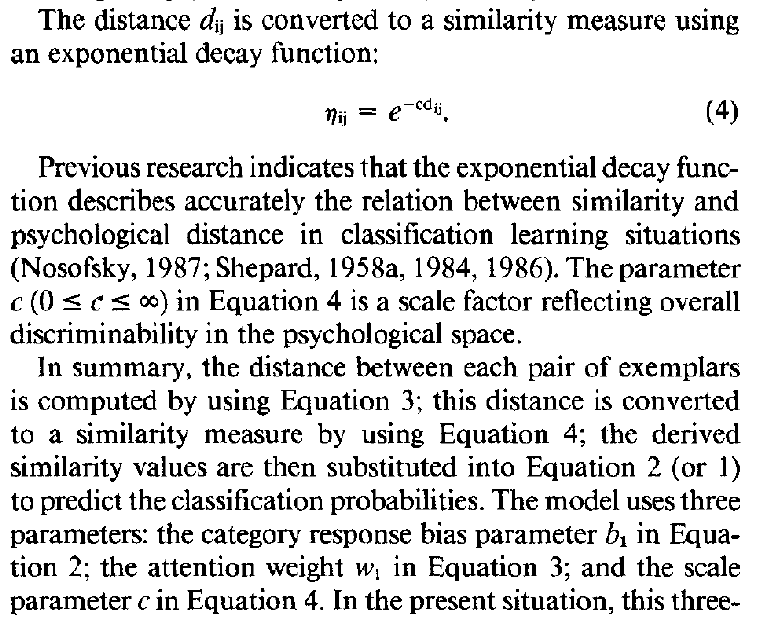

In [16]:
from IPython.display import Image

Image("Nosofsky_1988_Similarity_Equation.png", width = 573, height = 465)

Nosofsky's (1988) Equation 4 corresponds to the last part seen both the numerator and denominator of Wedel's (2012) Equation 1. This is the part that takes a distance measure, and turns it into a similarity score.

In addition to that, we also want to multiply the similarity score for each exemplar within a given category with its activation level (see quotes about perception from Wedel). The idea behind this must be that the more recent the exemplar, the more influence it should have. (I.e. if two exemplars from a given category are equally distant from the input exemplar, the most recent of the two should have a greater influence on the similarity score than the older one.)

In [17]:
import math

# Let's first create a listener. 
# To keep things simple, let's make it the same as the speaker:

listener_lexicon = speaker_lexicon

listener_activations = speaker_activations

# Let's take some example exemplars from this lexicon as defined above:
# exemplar_1_1 = [15, 25]
# exemplar_1_3 = [18, 28]
# with the following corresponding activation levels:
#activation_ex_1_1 = 0.4
#activation_ex_1_3 = 0.2

# Now let's imagine the listener gets the following vector as input from the speaker 
# (right in the middle between exemplar_1_1 and exemplar_1_3):

speaker_output = [16.5, 26.5]

def similarity_score(category_exemplar, category_exemplar_activation, input_exemplar, k):
    sum_similarity = 0.
    for dimension in range(len(input_exemplar)):
        input_exemplar_value = input_exemplar[dimension]
        category_exemplar_value = category_exemplar[dimension]
        distance = abs(input_exemplar_value-category_exemplar_value)
        similarity = math.exp(-k*distance)
        weighted_similarity = similarity*category_exemplar_activation
        sum_similarity += weighted_similarity
    return sum_similarity
        
k = 0.2

similarity_1_1 = similarity_score(exemplar_1_1, activation_ex_1_1, speaker_output, k)
print('')
print("similarity_1_1 is:")
print(similarity_1_1)

similarity_1_3 = similarity_score(exemplar_1_3, activation_ex_1_3, speaker_output, k)
print('')
print("similarity_1_3 is:")
print(similarity_1_3)


similarity_1_1 is:
0.5926545765453743

similarity_1_3 is:
0.2963272882726872


That seems to work at least: the similarity score for exemplar_1_3 comes out as lower, even though the distances are pretty much the same, because exemplar_1_3 has a lower activation level (half that of exemplar_1_1, to be exact). And we see that the similarity score of exemplar_1_3 indeed comes out as about half that of exemplar_1_1.

In [18]:
def sum_similarity_category(category_exemplars, exemplar_activations, input_exemplar, k):
    sum_similarity = 0.
    for i in range(len(category_exemplars)):
        exemplar = category_exemplars[i]
        activation = exemplar_activations[i]
        similarity = similarity_score(exemplar, activation, input_exemplar, k)
        sum_similarity += similarity
    return sum_similarity


def similarity_per_category(word_categories, activations, input_exemplar, k):
    similarity_per_word_category = []
    for i in range(len(word_categories)):
        word = word_categories[i]
        exemplar_activations = activations[i]
        similarity = sum_similarity_category(word, exemplar_activations, input_exemplar, k)
        similarity_per_word_category.append(similarity)
    return similarity_per_word_category


category_similarities = similarity_per_category(listener_lexicon, listener_activations, speaker_output, k)
print("category_similarities are:")
print(category_similarities)

category_similarities are:
[1.5221998119928382, 0.438217964235963, 0.4510492707459754, 0.00041301987043249446]


This looks right at least, in the sense that the speaker_output fits word category 1 the best, fits word categories 2 and 3 equally moderately, and fits word category 4 the worst

#####  Model description continued:

##### Anti-ambiguity bias

- From Winter & Wedel (2016): _"A final feature of the model is a bias against confusability of word perception, that is, an anti-ambiguity bias. The bias is implemented as follows: the probability of successful identification of an output with a word category is proportional to the degree to which the output uniquely maps to that category and to no other. In this way, distinctive speaker outputs are more likely to be stored than ambiguous outputs, with the result that distinctive phonetic values contribute more to the continuing evolution of the lexicon, both at the word and sound levels."_
- From Wedel (2012): _"When a speaker output is assigned to the best fitting category, it has a probability of being stored as a new exemplar that is the same as its calculated relative fit that category. For example, if the relative fit of a token to the best fitting category is .9, it has a 90% chance of being stored and a 10% chance of being discarded."_
- _"An anti-ambiguity bias is included at the level of the listener in this model in the form of a probability that a speaker output will not be stored as a new exemplar in the best-fitting category. This probability is the reciprocal of the similarity of that output to that category as calculated above, divided by the sum of its similarity to all categories. For example, if the similarity of a speaker output to the best fitting category is .9 relative to all categories, it will have a probability of .1 of not being stored."_ (Wedel, 2012; Appendix)

##### Intermezzo: Worked example for anti-ambiguity bias:

Ok, so here we need to take the output from the similarity_per_category() function, and calculate the *relative* fit of each category. I think that only means normalising the category_similarities values over all categories, thereby turning them into probabilities?

In [19]:
def relative_fit(category_similarities):
    normalised_similarities = []
    for similarity in category_similarities:
        normalised_fit = similarity/sum(category_similarities)
        normalised_similarities.append(normalised_fit)
    return normalised_similarities

relative_fit_probabilities = relative_fit(category_similarities)
print("relative_fit_probabilities are:")
print(relative_fit_probabilities)
# Let's check that these indeed sum to 1.0, just in case:
print('')
print("sum(relative_fit_probabilities) is:")
print(sum(relative_fit_probabilities))

relative_fit_probabilities are:
[0.6311258312209148, 0.1816914407394898, 0.18701148408923896, 0.00017124395035642603]

sum(relative_fit_probabilities) is:
1.0


#### Reciprocal??

So that should mean that the probability of adding the speaker_output to word category 1 (index 0) should be about 0.63

In [20]:
# But what does Wedel (2012) mean when he says "reciprocal" in the Appendix? 
# Does he mean reciprocal in the mathematical sense of 1/fit?
# We can't imagine he does; but who knows! Let's check what that would give us:

for fit in category_similarities:
    print('')
    print("fit is:")
    print(fit)
    reciprocal = 1./fit
    print("reciprocal is:")
    print(reciprocal)

# Hmm, I can't see how this would be relevant for getting what Wedel and Winter & Wedel 
# describe in the text when they talk about the anti-ambiguity bias.


fit is:
1.5221998119928382
reciprocal is:
0.6569439781304512

fit is:
0.438217964235963
reciprocal is:
2.281969434419488

fit is:
0.4510492707459754
reciprocal is:
2.217052692150756

fit is:
0.00041301987043249446
reciprocal is:
2421.191016676385


In [21]:
# Or do they make use of the reciprocal somehow to normalise the similarity measures
# to get the relative fit? Because the reciprocal is what to multiply a value by to get 1
# So to normalise the fit values per category, you could also multiply each of them with 
# the reciprocal of the sum similarity across all categories.

sum_similarity_across_categories = sum(category_similarities)
print('')
print("sum_similarity_across_categories is:")
print(sum_similarity_across_categories)

sum_normalised = sum_similarity_across_categories * (1./sum_similarity_across_categories)
print('')
print("sum_normalised is:")
print(sum_normalised)


fit_normalised_using_reciprocal_per_category = []
for fit in category_similarities:
    fit_normalised_using_reciprocal = fit*(1./sum_similarity_across_categories)
    fit_normalised_using_reciprocal_per_category.append(fit_normalised_using_reciprocal)
    
print('')
print("fit_normalised_using_reciprocal_per_category are:")
print(fit_normalised_using_reciprocal_per_category)


sum_similarity_across_categories is:
2.411880066845209

sum_normalised is:
1.0

fit_normalised_using_reciprocal_per_category are:
[0.6311258312209149, 0.1816914407394898, 0.18701148408923898, 0.00017124395035642603]


Ok, so this roundabout normalising procedure using the reciprocal does get us the same values as our relative_fit() function...

I tried having a look in Andy's code to see if I could find how the anti-ambiguity bias is implemented there, but it's a bit hard to figure out, because there's a part of the code that is for the case where "category competition" is switched on, and it's not entirely clear to me whether that's the same as the anti-ambiguity bias, or not. But if it is: it indeed works as I described above: When category competition is turned on, the probability of a given exemplar being added to its most-similar category is proportional to its similarity to that category.

#####  Model description continued:

### Pressures at play for continuer signals


#### Production:

1. *Weaken* the pressure for reuse of features: i.e. the within-segment similarity bias. --> This could simply consist of changing the weighting of the within-word similarity bias relative to the within-segment similarity bias. Wedel (2012) used 0.9:0.1 (word:segment). We could try a couple of other weight ratios. For example: 
    1. 1.8:0.1
    2. 2.7:0.1
    3. 3.6:0.1
    4. 0.9:0.0
    
    In other words, making the weighting of the word-similarity bias relative to the segment-similarity bias either 2, 3, or 4 times as high as in Wedel (2012). And, in the case of option D, removing the influence of the segment-similarity bias altogether.


2. *Strengthen* the pressure for minimal effort. This would mean strenthening the effect of the bias $b$ shown in Equation (2), by decreasing the value of $G$. Let's try the following values of $G$ for the continuers:
    1. $G = 2500$
    2. $G = 1666.66...$
    3. $G = 1250$
    
    These values produce a minimal effort bias that is, respectively, 2, 3, and 4 times as strong for the continuer words compared to the regular vocabulary words.
    
Let's have a look at how the bias value for segments at the edges of a dimension (i.e. segments with value 0 or 100) turn out with these different values of G. As mentioned above, with the bias of $G=5000$ that is used in Wedel (2012), these segment values result in a bias value of 0.5.

In [22]:
n = 100

g = 2500

bias_edge_left_1000 = bias(0, n, g)
print("bias_edge_left_1000 is:")
print(bias_edge_left_1000)

bias_edge_right_1000 = bias(100, n, g)
print("bias_edge_right_1000 is:")
print(bias_edge_right_1000)


g = 1666.66

bias_edge_left_500 = bias(0, n, g)
print("bias_edge_left_500 is:")
print(bias_edge_left_500)

bias_edge_right_500 = bias(100, n, g)
print("bias_edge_right_500 is:")
print(bias_edge_right_500)


g = 1250

bias_edge_left_250 = bias(0, n, g)
print("bias_edge_left_250 is:")
print(bias_edge_left_250)

bias_edge_right_250 = bias(100, n, g)
print("bias_edge_right_250 is:")
print(bias_edge_right_250)

bias_edge_left_1000 is:
1.0
bias_edge_right_1000 is:
1.0
bias_edge_left_500 is:
1.500006000024
bias_edge_right_500 is:
1.500006000024
bias_edge_left_250 is:
2.0
bias_edge_right_250 is:
2.0


So, compared to the bias parameter $G=5000$ that is used in Wedel (2012), which produces a bias at the edges of 0.5, we can state that:

- $G=2500$ yields a minimal effort bias that is 2 times as strong as the minimal effort bias used in Wedel (2012)
- $G=1666.66$ yields a minimal effort bias that is 3 times as strong as the minimal effort bias used in Wedel (2012)
- $G=1250$ yields a minimal effort bias that is 4 times as strong as the minimal effort bias used in Wedel (2012)

#### Perception:

Nothing in particular for now. (This is where we could implement our idea of an extra anti-ambiguity pressure that acts *between* the class of "regular vocabulary" on the one hand, and the class of "collatoral signals" on the other hand. But we will not implement this pressure for now, because we don't find it sufficiently independently motivated from the easing of the reuse of features pressure.)

## Measures:

### Measure to calculate "squareness":

In [23]:
import numpy as np

# NOTE that this code only works for a simulation with exactly 4 words.



# Let's make up some example values for the centroids, and enumerate all the
# possible ways in which they can be a square. Because the way the values
# line up on Dimension 1 determines how the values on Dimension 2 should
# line up in order to form a square, I believe there are only three possible
# ways of forming a square. The comments above the centroid arrays show
# the corresponding translation into "pairings" between segment values along
# the different dimensions.

# dimension 1: [[0, 1], [2, 3]] # Meaning: along Dimension 1, the segments of 
                                # categories 0 and 1 lie close together, and 
                                # the segments of categories 2 and 3
                                # lie close together.
# dimension 2: [[0, 2], [1, 3]] # These are the corresponding pairings of categories
                                # that are necessary along Dimension 2, in order to
                                # complement those along Dimension 1, in such a way
                                # that you get a square.
centroids_square_1 = np.array([[15, 25], 
                               [20, 80], 
                               [65, 15], 
                               [75, 85]])

# dimension 1: [[0, 2], [1, 3]]
# dimension 2: [[0, 1], [2, 3]]
centroids_square_2 = np.array([[15, 25], 
                               [65, 15], 
                               [20, 80], 
                               [75, 85]])

# dimension 1: [[0, 3], [1, 2]]
# dimension 2: [[0, 1], [2, 3]]
centroids_square_3 = np.array([[15, 25], 
                               [65, 15], 
                               [75, 85], 
                               [20, 80]])


# So these are the three possible pairings between segment values along
# the different dimensions that result in a square (separated by dimension):

possible_pairings_dimension_1 = np.array([[[0, 1], [2, 3]], 
                                          [[0, 2], [1, 3]], 
                                          [[0, 3], [1, 2]]])
 
corresponding_mappings_dimension_2 = np.array([[[0, 2], [1, 3]], 
                                               [[0, 1], [2, 3]], 
                                               [[0, 1], [2, 3]]])
n_dimensions = 2

def pairwise_distances(centroids, all_possible_pairings, n_dimensions):
    distances_per_dimension = np.zeros((len(all_possible_pairings), n_dimensions))
    for p in range(len(all_possible_pairings)):
        pairing = all_possible_pairings[p]
        print('')
        print('')
        print("pairing is:")
        print(pairing)
        distance_per_dimension = np.zeros(n_dimensions)
        for d in range(n_dimensions):
            total_distance = 0.
            for pair in pairing:
                print('')
                print("pair is:")
                print(pair)
                index_i = pair[0]
                index_j = pair[1]
                segment_value_i = centroids[index_i][d]
                segment_value_j = centroids[index_j][d]
                print("segment_value_i is:")
                print(segment_value_i)      
                print("segment_value_j is:")
                print(segment_value_j)   
                total_distance += abs(segment_value_i-segment_value_j)
                print("distance is:")
                print(abs(segment_value_i-segment_value_j))
            distance_per_dimension[d] = total_distance
        print("total_distance is:")
        print(total_distance)
        distances_per_dimension[p] = distance_per_dimension
    return distances_per_dimension

distances_per_dimension = pairwise_distances(centroids_square_1, all_possible_pairings, n_dimensions)
print("distances_per_dimension are:")
print(distances_per_dimension)

NameError: name 'all_possible_pairings' is not defined

### XXXXXX's [name redacted] implementation

In [1]:
import numpy as np

centroids_square = np.array([[15, 25], 
                             [20, 80], 
                             [65, 15], 
                             [75, 85]])

all_possible_pairings = np.array([[[[0, 1], [0, 2]], [[2, 3], [1, 3]]], 
                                 [[[0, 2], [0, 1]], [[1, 3], [2, 3]]], 
                                 [[[0, 3], [0, 1]], [[1, 2], [2, 3]]]])

# possible_pairings_dimension_1 = np.array([[[0, 1], [2, 3]], 
#                                           [[0, 2], [1, 3]], 
#                                           [[0, 3], [1, 2]]])
 
# corresponding_mappings_dimension_2 = np.array([[[0, 2], [1, 3]], 
#                                                [[0, 1], [2, 3]], 
#                                                [[0, 1], [2, 3]]])

n_dimensions = 2


def pairwise_distances(centroids, all_possible_pairings, n_dimensions):
    distances_per_dimension = np.zeros((len(all_possible_pairings), n_dimensions))
    distances_pairings = np.zeros(len(all_possible_pairings))
    for p in range(len(all_possible_pairings)):
        pairing = all_possible_pairings[p]
        print('')
        print('')
        print("pairing is:")
        print(pairing)
        distance_per_dimension = np.zeros(n_dimensions)
        for d in range(n_dimensions):
            total_distance = 0.
            for pair in pairing:
                print('')
                print("pair is:")
                print(pair)
                index_i = pair[d][0]
                index_j = pair[d][1]
                segment_value_i = centroids[index_i][d]
                segment_value_j = centroids[index_j][d]
                print("segment_value_i is:")
                print(segment_value_i)      
                print("segment_value_j is:")
                print(segment_value_j)   
                total_distance += abs(segment_value_i-segment_value_j)
                print("distance is:")
                print(abs(segment_value_i-segment_value_j))
            distance_per_dimension[d] = total_distance
        print("total_distance is:")
        print(total_distance)
        distances_per_dimension[p] = distance_per_dimension
        distances_pairings[p] = np.sum(distances_per_dimension[p])
    return distances_per_dimension, distances_pairings

distances_per_dimension, distances_pairings = pairwise_distances(centroids_square, all_possible_pairings, n_dimensions)
print("distances_per_dimension are:")
print(distances_per_dimension)
print("distances_possibilities are:")
print(distances_pairings)

def choose_fitting_pairing(distances_pairings):
    smallest_distance = np.amin(distances_pairings)
    #smallest_index = np.where(smallest_distance)
    smallest_index = np.argmin(distances_pairings)
    #return smallest_distance, smallest_index[0][0]
    return smallest_distance, smallest_index

smallest_distance, smallest_index = choose_fitting_pairing(distances_pairings)
print("Smallest distance: ", smallest_distance)
print("Index smallest distance: ", smallest_index)



pairing is:
[[[0 1]
  [0 2]]

 [[2 3]
  [1 3]]]

pair is:
[[0 1]
 [0 2]]
segment_value_i is:
15
segment_value_j is:
20
distance is:
5

pair is:
[[2 3]
 [1 3]]
segment_value_i is:
65
segment_value_j is:
75
distance is:
10

pair is:
[[0 1]
 [0 2]]
segment_value_i is:
25
segment_value_j is:
15
distance is:
10

pair is:
[[2 3]
 [1 3]]
segment_value_i is:
80
segment_value_j is:
85
distance is:
5
total_distance is:
15.0


pairing is:
[[[0 2]
  [0 1]]

 [[1 3]
  [2 3]]]

pair is:
[[0 2]
 [0 1]]
segment_value_i is:
15
segment_value_j is:
65
distance is:
50

pair is:
[[1 3]
 [2 3]]
segment_value_i is:
20
segment_value_j is:
75
distance is:
55

pair is:
[[0 2]
 [0 1]]
segment_value_i is:
25
segment_value_j is:
80
distance is:
55

pair is:
[[1 3]
 [2 3]]
segment_value_i is:
15
segment_value_j is:
85
distance is:
70
total_distance is:
125.0


pairing is:
[[[0 3]
  [0 1]]

 [[1 2]
  [2 3]]]

pair is:
[[0 3]
 [0 1]]
segment_value_i is:
15
segment_value_j is:
75
distance is:
60

pair is:
[[1 2]
 [2

In [25]:
# XXXXX [name redacted] checking the results for the other possible squares of centroids:


centroids_square_1 = np.array([[15, 25], 
                               [20, 80], 
                               [65, 15], 
                               [75, 85]])

# dimension 1: [[0, 2], [1, 3]]
# dimension 2: [[0, 1], [2, 3]]
centroids_square_2 = np.array([[15, 25], 
                               [65, 15], 
                               [20, 80], 
                               [75, 85]])

# dimension 1: [[0, 3], [1, 2]]
# dimension 2: [[0, 1], [2, 3]]
centroids_square_3 = np.array([[15, 25], 
                               [65, 15], 
                               [75, 85], 
                               [20, 80]])


print('')
print('')
print('CENTROIDS SQUARE 1 RESULTS')
print('')

distances_per_dimension_1, distances_pairings_1 = pairwise_distances(centroids_square_1, all_possible_pairings, n_dimensions)
print("distances_per_dimension_1 are:")
print(distances_per_dimension_1)
print("distances_possibilities_1 are:")
print(distances_pairings_1)

smallest_distance_1, smallest_index_1 = choose_fitting_pairing(distances_pairings_1)
print("Smallest distance: ", smallest_distance_1)
print("Index smallest distance: ", smallest_index_1)




print('')
print('')
print('CENTROIDS SQUARE 2 RESULTS')
print('')

distances_per_dimension_2, distances_pairings_2 = pairwise_distances(centroids_square_2, all_possible_pairings, n_dimensions)
print("distances_per_dimension_2 are:")
print(distances_per_dimension_2)
print("distances_possibilities_2 are:")
print(distances_pairings_2)

smallest_distance_2, smallest_index_2 = choose_fitting_pairing(distances_pairings_2)
print("Smallest distance: ", smallest_distance_2)
print("Index smallest distance: ", smallest_index_2)



print('')
print('')
print('CENTROIDS SQUARE 3 RESULTS')
print('')

distances_per_dimension_3, distances_pairings_3 = pairwise_distances(centroids_square_3, all_possible_pairings, n_dimensions)
print("distances_per_dimension_3 are:")
print(distances_per_dimension_3)
print("distances_possibilities_3 are:")
print(distances_pairings_3)

smallest_distance_3, smallest_index_3 = choose_fitting_pairing(distances_pairings_3)
print("Smallest distance: ", smallest_distance_3)
print("Index smallest distance: ", smallest_index_3)



CENTROIDS SQUARE 1 RESULTS



pairing is:
[[[0 1]
  [0 2]]

 [[2 3]
  [1 3]]]

pair is:
[[0 1]
 [0 2]]
segment_value_i is:
15
segment_value_j is:
20
distance is:
5

pair is:
[[2 3]
 [1 3]]
segment_value_i is:
65
segment_value_j is:
75
distance is:
10

pair is:
[[0 1]
 [0 2]]
segment_value_i is:
25
segment_value_j is:
15
distance is:
10

pair is:
[[2 3]
 [1 3]]
segment_value_i is:
80
segment_value_j is:
85
distance is:
5
total_distance is:
15.0


pairing is:
[[[0 2]
  [0 1]]

 [[1 3]
  [2 3]]]

pair is:
[[0 2]
 [0 1]]
segment_value_i is:
15
segment_value_j is:
65
distance is:
50

pair is:
[[1 3]
 [2 3]]
segment_value_i is:
20
segment_value_j is:
75
distance is:
55

pair is:
[[0 2]
 [0 1]]
segment_value_i is:
25
segment_value_j is:
80
distance is:
55

pair is:
[[1 3]
 [2 3]]
segment_value_i is:
15
segment_value_j is:
85
distance is:
70
total_distance is:
125.0


pairing is:
[[[0 3]
  [0 1]]

 [[1 2]
  [2 3]]]

pair is:
[[0 3]
 [0 1]]
segment_value_i is:
15
segment_value_j is:
75
distan

In [26]:
# Excluding the cases in which the cluster centroids overlap

# Dus per cluster x en per dimensie d de exemplar nemen die het verst uit het midden ligt, 
# en dan checken of er nog wel een positive distance is tussen die exemplar en de dichtstbijzijnde 
# exemplar van de corresponderende cluster y die met dit cluster x ge"paired" is op de *andere* dimensie



## References

Wedel, A. (2012). Lexical contrast maintenance and the organization of sublexical contrast systems. Language and Cognition, 4(4), 319–355. https://doi.org/10.1515/langcog-2012-0018

Winter, B., & Wedel, A. (2016). The Co-evolution of Speech and the Lexicon: The Interaction of Functional Pressures, Redundancy, and Category Variation. Topics in Cognitive Science, 8(2), 503–513. https://doi.org/10.1111/tops.12202